In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import plotly.express as px

In [21]:
customers  = pd.read_csv('csv normalizados\csv normalizados\CustomersNor.csv')
order_items=pd.read_csv('csv normalizados\csv normalizados\Order_itemsNor.csv', infer_datetime_format = True)
products  = pd.read_csv('csv normalizados\csv normalizados\ProductsNor.csv')
orders=pd.read_csv('csv normalizados\csv normalizados\OrdersNor.csv')

In [22]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Sao Paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Taboao Da Serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Canoas,RS


In [23]:
customers_state = customers.groupby(['customer_state']).count()

In [24]:
customers_state.reset_index(inplace=True)
customers_state.sort_values('customer_id', ascending=False, inplace=True)
fig = px.bar(customers_state, y='customer_id', x='customer_state', text_auto='.2s',
            title="Cantidad de compradores por estado")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
#fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))
fig.show()

In [26]:
customers_state.rename(columns={'customer_state':'state'}, inplace=True)

In [27]:
customers_state

,state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city
25,SP,41746,41746,41746,41746
18,RJ,12852,12852,12852,12852
10,MG,11635,11635,11635,11635
22,RS,5466,5466,5466,5466
17,PR,5045,5045,5045,5045
23,SC,3637,3637,3637,3637
4,BA,3380,3380,3380,3380
6,DF,2140,2140,2140,2140
7,ES,2033,2033,2033,2033
8,GO,2020,2020,2020,2020


In [17]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [5]:
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].apply(pd.to_datetime).dt.date


In [6]:

#creo columna mes
order_items['month'] = order_items.shipping_limit_date.apply(lambda x: x.month)
#creo columna año
order_items['Year'] = order_items.shipping_limit_date.apply(lambda x: x.year)
#creo columna mes/año
order_items['month_year'] = order_items['month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
order_items['month_year'] = order_items['Year'].astype(str) + '-' + order_items['month_year'].astype(str)
#creating year month column
order_items['month_y'] = order_items['shipping_limit_date'].map(lambda date: 100*date.year + date.month)
#ordeno valores
order_items.sort_values('month_y', inplace=True)
#agrego columna total
order_items['total_price'] = order_items['price'] + order_items['freight_value']

In [7]:
order_items_fil = order_items.loc[(order_items['month_year']<'2018-08')]

In [8]:
product_vendidos = order_items_fil.groupby(['month_year','Year']).count()

In [9]:
product_vendidos.reset_index(inplace=True)

In [10]:
product_vendidos=product_vendidos[product_vendidos.Year==int('2016')]
product_vendidos

,month_year,Year,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month,month_y,total_price
0,2016-09,2016,4,4,4,4,4,4,4,4,4,4
1,2016-10,2016,365,365,365,365,365,365,365,365,365,365
2,2016-12,2016,1,1,1,1,1,1,1,1,1,1


In [11]:
fig = px.bar(product_vendidos, y='order_id', x='month_year', text_auto='.3s',
            title="Cantidad de productos vendidos por mes")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
#fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))
fig.show()

In [12]:
order_product = pd.merge(order_items_fil,products, on=["product_id"])

In [13]:
def format_chart(ax):
    ax.title.set_size(14)
    ax.xaxis.label.set_size(13)
    ax.yaxis.label.set_size(13)
    ax.tick_params(labelsize=11)

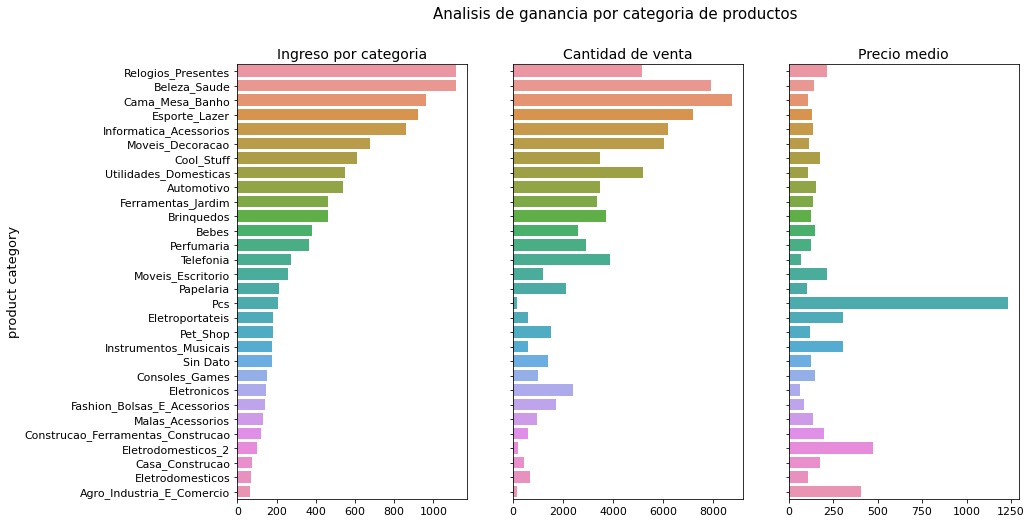

In [14]:
prod_cat=order_product.pivot_table(values=['price', 'order_id'], index=['product_category_name']
                          , aggfunc={'price': 'sum', 'order_id': 'nunique'})
prod_cat["ord_size($R)"]=prod_cat["price"]/prod_cat["order_id"]
prod_cat["price"]=prod_cat["price"]/1000
prod_cat.sort_values(by='price', ascending = False, inplace = True)
prod_cat_top=prod_cat.rename(columns={'order_id':'no_of_order','price':"revenue($R1000)"}).head(30)

#present data to bar plots:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8), sharey=True)
fig.suptitle('Analisis de ganancia por categoria de productos', fontsize=15)

sns.barplot(ax=ax[0], x='revenue($R1000)', y= prod_cat_top.index, data = prod_cat_top)
ax[0].set_title('Ingreso por categoria')
ax[0].set_ylabel('product category')

sns.barplot(ax=ax[1], x='no_of_order', y = prod_cat_top.index, data = prod_cat_top)
ax[1].set_title('Cantidad de venta')

sns.barplot(ax=ax[2], x='ord_size($R)', y = prod_cat_top.index, data = prod_cat_top)
ax[2].set_title('Precio medio')

for i in range(0,3):
    ax[i].set(xlabel=None)

for i in range(1,3):
    ax[i].set(ylabel=None)

#call defined function "format_chart_small" to format charts:
format_chart(ax[0])
format_chart(ax[1])
format_chart(ax[2])
plt.savefig('Analisis de ganancia por categoria de productos', dpi=400, bbox_inches='tight');

In [16]:
prod_cat=prod_cat[prod_cat.order_id>1]

In [17]:
prod_cat=prod_cat[prod_cat.price>5]

,order_id,price,ord_size($R)
product_category_name,,,
Relogios_Presentes,5143,1116.32796,217.057741
Beleza_Saude,7932,1115.72565,140.661328
Cama_Mesa_Banho,8760,964.95066,110.154185
Esporte_Lazer,7193,922.81695,128.293751
Informatica_Acessorios,6209,861.11702,138.688520
...,...,...,...
Casa_Conforto_2,24,0.76027,31.677917
Cds_Dvds_Musicais,12,0.73000,60.833333
Pc_Gamer,5,0.64995,129.990000


In [ ]:
customers = pd.read_csv('C:/Users/notebook/OneDrive/Escritorio/Henry clase/Proyecto grupal OLIST/e-comerce_Olist_dataset/olist_customers_dataset.csv')

In [28]:
sellers  = pd.read_csv('csv normalizados\csv normalizados\SellersNor.csv')

In [29]:
seller_state = sellers.groupby(['seller_state']).count()
seller_state.reset_index(inplace=True)
seller_state.rename(columns={'seller_state':'state'}, inplace=True)
seller_state.sort_values('seller_id', ascending=False, inplace=True)
figvendedores = px.bar(seller_state, y='seller_id', x='state', text_auto='.2s',
            title="Cantidad de vendedores por estado")
figvendedores.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

In [31]:
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].apply(pd.to_datetime).dt.date
#creo columna mes
order_items['month'] = order_items.shipping_limit_date.apply(lambda x: x.month)
#creo columna año
order_items['Year'] = order_items.shipping_limit_date.apply(lambda x: x.year)
#creo columna mes/año
order_items['month_year'] = order_items['month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
order_items['month_year'] = order_items['Year'].astype(str) + '-' + order_items['month_year'].astype(str)
#creating year month column
order_items['month_y'] = order_items['shipping_limit_date'].map(lambda date: 100*date.year + date.month)
#ordeno valores
order_items.sort_values('month_y', inplace=True)
#agrego columna total
order_items['total_price'] = order_items['price'] + order_items['freight_value']
order_items_fil = order_items.loc[(order_items["month_year"] >= '2017-01') & (order_items['month_year']<'2018-08')]


In [32]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month,Year,month_year,month_y,total_price
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19,44.99,2.83,9,2016,2016-09,201609,47.82
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19,44.99,2.83,9,2016,2016-09,201609,47.82
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19,44.99,2.83,9,2016,2016-09,201609,47.82
101394,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19,59.50,15.56,9,2016,2016-09,201609,75.06
78152,b1d88d1e4179448cac98b8d433e23316,1,6c0d548acd149f30331671548dda66e8,440dd6ab244315c632130ecfb63827b1,2016-10-11,89.90,17.47,10,2016,2016-10,201610,107.37
...,...,...,...,...,...,...,...,...,...,...,...,...
83702,be16ab3862dd2927ab1e3cb7434007f6,1,64fb13596caf118c438edc5c6ed2d50a,88460e8ebdecbfecb5f9601833981930,2018-09-04,69.90,18.59,9,2018,2018-09,201809,88.49
8643,13bdf405f961a6deec817d817f5c6624,1,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,2020-02-05,69.99,14.66,2,2020,2020-02,202002,84.65
68516,9c94a4ea2f7876660fa6f1b59b69c8e6,1,282b126b2354516c5f400154398f616d,7a241947449cc45dbfda4f9d0798d9d0,2020-02-03,75.99,14.70,2,2020,2020-02,202002,90.69
85729,c2bb89b5c1dd978d507284be78a04cb2,1,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09,99.99,61.44,4,2020,2020-04,202004,161.43


In [33]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,Palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,Sao Paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Pelotas,RS


In [34]:
sellers=sellers.rename(columns={'seller_state':'state'})

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

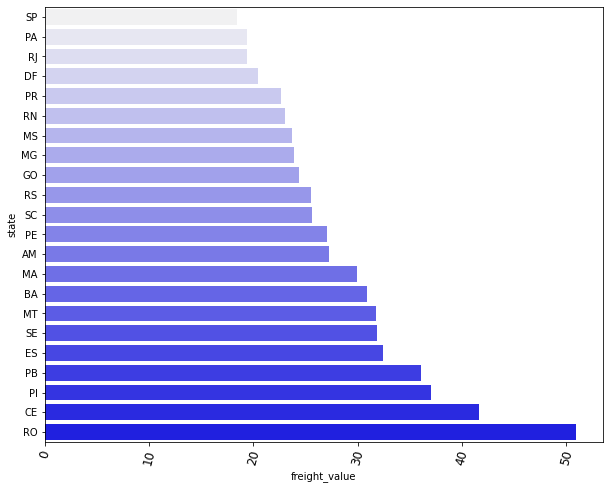

In [38]:
sellers_order = pd.merge(order_items_fil,sellers, on=["seller_id"])
costo_promedio = sellers_order.groupby(['state']).agg({'freight_value':'mean'})
costo_promedio.reset_index(inplace=True)
costo_promedio.sort_values('freight_value',inplace=True)
figcostoenvio, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=costo_promedio.freight_value, y=costo_promedio.state, palette="light:b")
plt.xticks(fontsize=12,rotation=75)


In [40]:
order_items  = pd.read_csv('csv normalizados\csv normalizados\Order_itemsNor.csv')
products  = pd.read_csv('csv normalizados\csv normalizados\ProductsNor.csv')
order_reviews  = pd.read_csv('csv normalizados\csv normalizados\Order_reviewsNor.csv')



order_items['shipping_limit_date'] = order_items['shipping_limit_date'].apply(pd.to_datetime).dt.date
#creo columna mes
order_items['month'] = order_items.shipping_limit_date.apply(lambda x: x.month)
#creo columna año
order_items['Year'] = order_items.shipping_limit_date.apply(lambda x: x.year)
#creo columna mes/año
order_items['month_year'] = order_items['month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
order_items['month_year'] = order_items['Year'].astype(str) + '-' + order_items['month_year'].astype(str)
#creating year month column
order_items['month_y'] = order_items['shipping_limit_date'].map(lambda date: 100*date.year + date.month)
#ordeno valores
order_items.sort_values('month_y', inplace=True)
#agrego columna total
order_items['total_price'] = order_items['price'] + order_items['freight_value']
order_items_fil = order_items.loc[(order_items["month_year"] >= '2017-01') & (order_items['month_year']<'2018-08')]


order_product = pd.merge(order_items_fil,products, on=["product_id"])
categorias=order_product.groupby('product_category_name').count()
categorias.sort_values('product_id', inplace=True, ascending=False)
top_10_cat = categorias.head(10)
top_10_cat.reset_index(inplace=True)

In [49]:
figtopcategoria = px.treemap(top_10_cat, path=['product_category_name'],
                 values='order_id', title="Top categorias")
 

In [50]:
figtopcategoria.show()

In [51]:
top_10_cat

,product_category_name,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month,Year,month_year,month_y,total_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Cama_Mesa_Banho,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323,10323
1,Beleza_Saude,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643
2,Esporte_Lazer,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044,8044
3,Moveis_Decoracao,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722,7722
4,Informatica_Acessorios,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271
5,Utilidades_Domesticas,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152
6,Relogios_Presentes,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478
7,Telefonia,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181,4181
8,Ferramentas_Jardim,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168
9,Brinquedos,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889


In [52]:
top_10_cat_mostrar=top_10_cat[['product_category_name','order_id']]
top_10_cat_mostrar.rename(columns={'order_id':'cantidad'})

In [54]:
top_10_cat_mostrar

,product_category_name,order_id
0,Cama_Mesa_Banho,10323
1,Beleza_Saude,8643
2,Esporte_Lazer,8044
3,Moveis_Decoracao,7722
4,Informatica_Acessorios,7271
5,Utilidades_Domesticas,6152
6,Relogios_Presentes,5478
7,Telefonia,4181
8,Ferramentas_Jardim,4168
9,Brinquedos,3889


In [65]:
volumen=order_items_fil.groupby('month_year').agg({'total_price':'sum', 'order_id':'count'})

In [60]:
volumen

,total_price,order_id,Volumen
month_year,,,
2016-09,218.52,4,8.740800e+02
2016-10,56945.07,365,2.078495e+07
2016-12,19.62,1,1.962000e+01
2017-01,92198.41,681,6.278712e+07
2017-02,282731.52,1866,5.275770e+08
2017-03,396542.39,2751,1.090888e+09
2017-04,352845.76,2364,8.341274e+08
2017-05,586221.79,4150,2.432820e+09
2017-06,543623.12,3801,2.066311e+09


In [66]:
volumen.drop(columns="Volumen", inplace=True)

KeyError: "['Volumen'] not found in axis"

In [67]:
volumen.reset_index(inplace=True)

In [68]:
fig = px.bar(volumen, y='total_price', x='month_year', text_auto='.3s',
            title="Cantidad de productos vendidos por mes")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
#fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))
fig.show()

In [79]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Esporte_Lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Utilidades_Domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Moveis_Decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construcao_Ferramentas_Iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Cama_Mesa_Banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Informatica_Acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
customers_order = pd.merge(orders,customers, on=["customer_id"])
customers_order['time_delay'] = (customers_order['order_delivered_customer_date'] - customers_order['order_estimated_delivery_date'])
oneday = pd.Timedelta(days=1)

customers_order['time_delay'] = (customers_order['order_delivered_customer_date'] - customers_order['order_estimated_delivery_date']) / oneday
customers_order['est_to_deliver'] = np.where(customers_order['time_delay']<0, 1, 0)
dlv_df=customers_order[['order_id','est_to_deliver']]
dlv=dlv_df.pivot_table(values='order_id',index='est_to_deliver', aggfunc='nunique')
dlv.sort_values(by='order_id', ascending=False, inplace=True)